In [1]:
!pip install pycaret

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [4]:
from google.colab import files


uploaded = files.upload()


Saving heart.csv to heart (1).csv


In [5]:

df = pd.read_csv(r'heart.csv')
df.head(25)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0    40   M           ATA        140          289          0     Normal   
1    49   F           NAP        160          180          0     Normal   
2    37   M           ATA        130          283          0         ST   
3    48   F           ASY        138          214          0     Normal   
4    54   M           NAP        150          195          0     Normal   
5    39   M           NAP        120          339          0     Normal   
6    45   F           ATA        130          237          0     Normal   
7    54   M           ATA        110          208          0     Normal   
8    37   M           ASY        140          207          0     Normal   
9    48   F           ATA        120          284          0     Normal   
10   37   F           NAP        130          211          0     Normal   
11   58   M           ATA        136          164          0         ST   
12   39   M           ATA        120          204          0     Normal   
13   49   M           ASY        140          234          0     Normal   
14   42   F           NAP        115          211          0         ST   
15   54   F           ATA        120          273          0     Normal   
16   38   M           ASY        110          196          0     Normal   
17   43   F           ATA        120          201          0     Normal   
18   60   M           ASY        100          248          0     Normal   
19   36   M           ATA        120          267          0     Normal   
20   43   F            TA        100          223          0     Normal   
21   44   M           ATA        120          184          0     Normal   
22   49   F           ATA        124          201          0     Normal   
23   44   M           ATA        150          288          0     Normal   
24   40   M           NAP        130          215          0     Normal   

    MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0     172              N      0.0       Up             0  
1     156              N      1.0     Flat             1  
2      98              N      0.0       Up             0  
3     108              Y      1.5     Flat             1  
4     122              N      0.0       Up             0  
5     170              N      0.0       Up             0  
6     170              N      0.0       Up             0  
7     142              N      0.0       Up             0  
8     130              Y      1.5     Flat             1  
9     120              N      0.0       Up             0  
10    142              N      0.0       Up             0  
11     99              Y      2.0     Flat             1  
12    145              N      0.0       Up             0  
13    140              Y      1.0     Flat             1  
14    137              N      0.0       Up             0  
15    150              N      1.5     Flat             0  
16    166              N      0.0     Flat             1  
17    165              N      0.0       Up             0  
18    125              N      1.0     Flat             1  
19    160              N      3.0     Flat             1  
20    142              N      0.0       Up             0  
21    142              N      1.0     Flat             0  
22    164              N      0.0       Up             0  
23    150              Y      3.0     Flat             1  
24    138              N      0.0       Up             0

In [6]:
len(df.index)

918

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


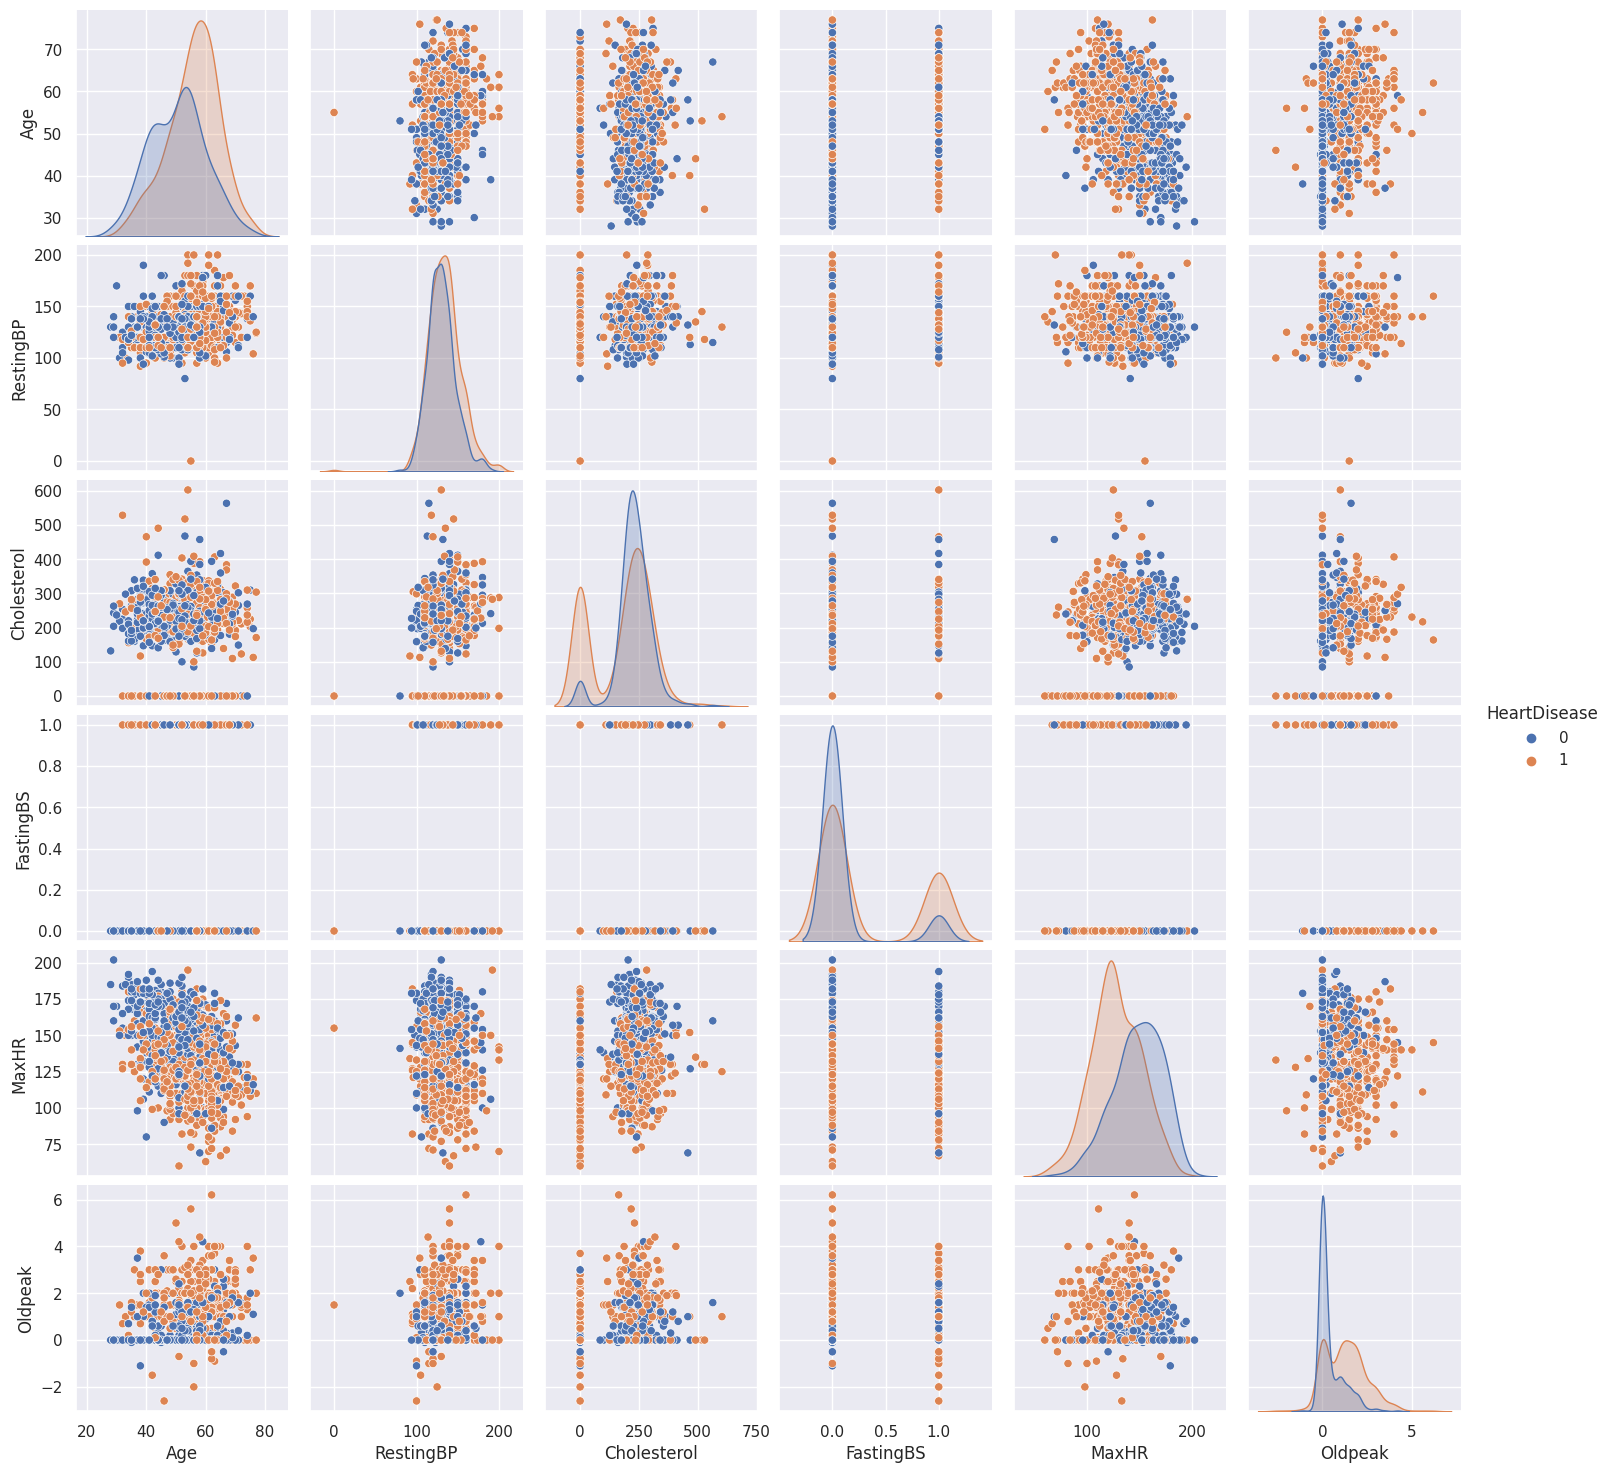

In [8]:

sns.pairplot(df, hue='HeartDisease')
plt.show()


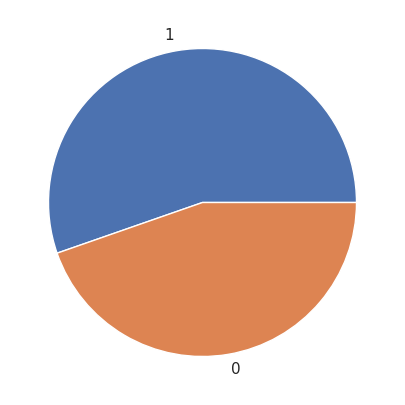

In [9]:
y =df['HeartDisease']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [10]:
X = df.drop(columns=['HeartDisease','Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'])
X.head(10)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak
0   40        140          289          0    172      0.0
1   49        160          180          0    156      1.0
2   37        130          283          0     98      0.0
3   48        138          214          0    108      1.5
4   54        150          195          0    122      0.0
5   39        120          339          0    170      0.0
6   45        130          237          0    170      0.0
7   54        110          208          0    142      0.0
8   37        140          207          0    130      1.5
9   48        120          284          0    120      0.0

In [11]:
X.describe().transpose()

count        mean         std   min     25%    50%    75%    max
Age          918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP    918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol  918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS    918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR        918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak      918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2

In [12]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak
0 -1.433140   0.410909     0.825070  -0.551341  1.382928 -0.832432
1 -0.478484   1.491752    -0.171961  -0.551341  0.754157  0.105664
2 -1.751359  -0.129513     0.770188  -0.551341 -1.525138 -0.832432
3 -0.584556   0.302825     0.139040  -0.551341 -1.132156  0.574711
4  0.051881   0.951331    -0.034755  -0.551341 -0.581981 -0.832432
5 -1.539213  -0.669935     1.282424  -0.551341  1.304332 -0.832432
6 -0.902775  -0.129513     0.349422  -0.551341  1.304332 -0.832432
7  0.051881  -1.210356     0.084157  -0.551341  0.203982 -0.832432
8 -1.751359   0.410909     0.075010  -0.551341 -0.267596  0.574711
9 -0.584556  -0.669935     0.779335  -0.551341 -0.660578 -0.832432

In [13]:
X.describe().transpose()


count          mean       std       min       25%       50%  \
Age          918.0 -1.083616e-16  1.000545 -2.706015 -0.690629  0.051881   
RestingBP    918.0  1.954380e-16  1.000545 -7.154995 -0.669935 -0.129513   
Cholesterol  918.0  0.000000e+00  1.000545 -1.818435 -0.233704  0.221363   
FastingBS    918.0 -3.096047e-17  1.000545 -0.551341 -0.551341 -0.551341   
MaxHR        918.0  4.953675e-16  1.000545 -3.018469 -0.660578  0.046790   
Oldpeak      918.0  1.238419e-16  1.000545 -3.271482 -0.832432 -0.269575   

                  75%       max  
Age          0.688318  2.491558  
RestingBP    0.410909  3.653439  
Cholesterol  0.623835  3.697252  
FastingBS   -0.551341  1.813758  
MaxHR        0.754157  2.561874  
Oldpeak      0.574711  4.983762

In [14]:
observations = list(df.index)
variables = list(df.columns)

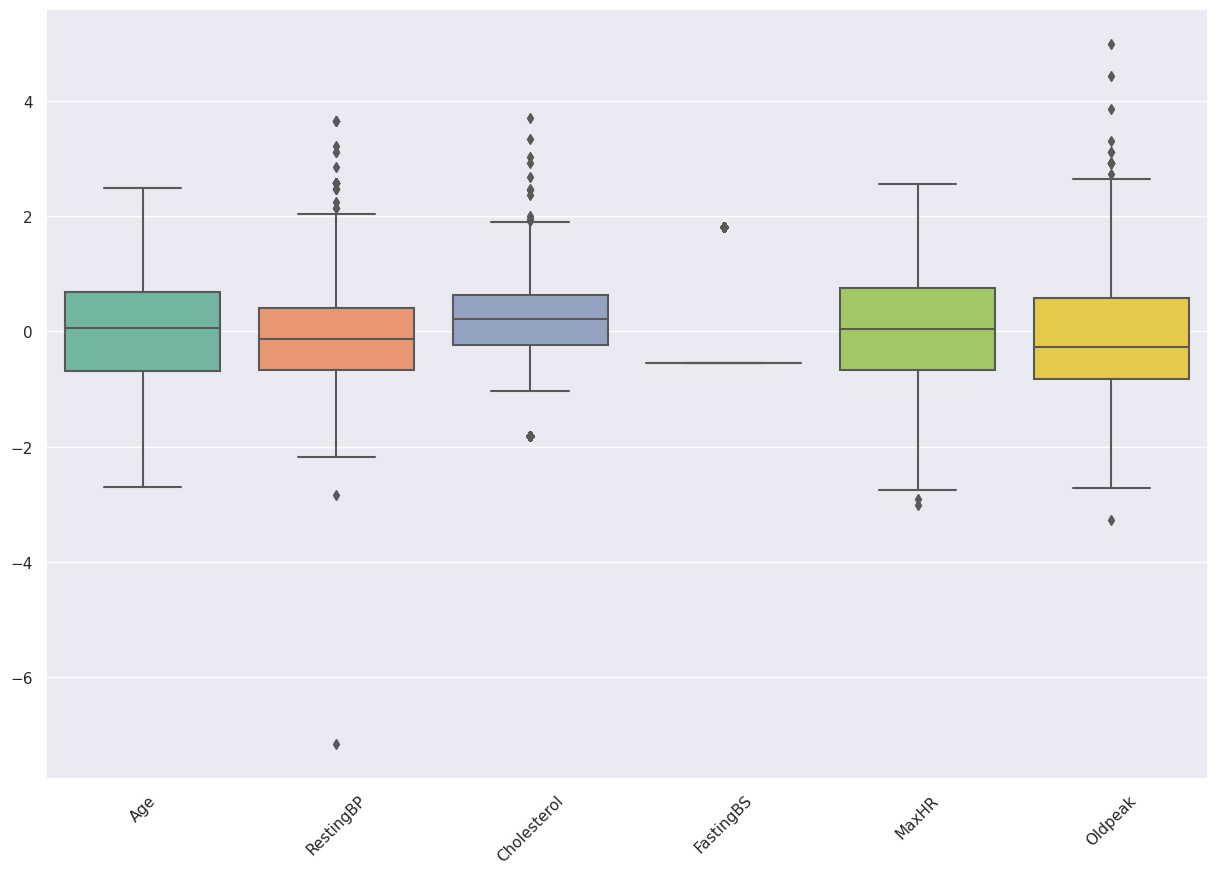

In [15]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


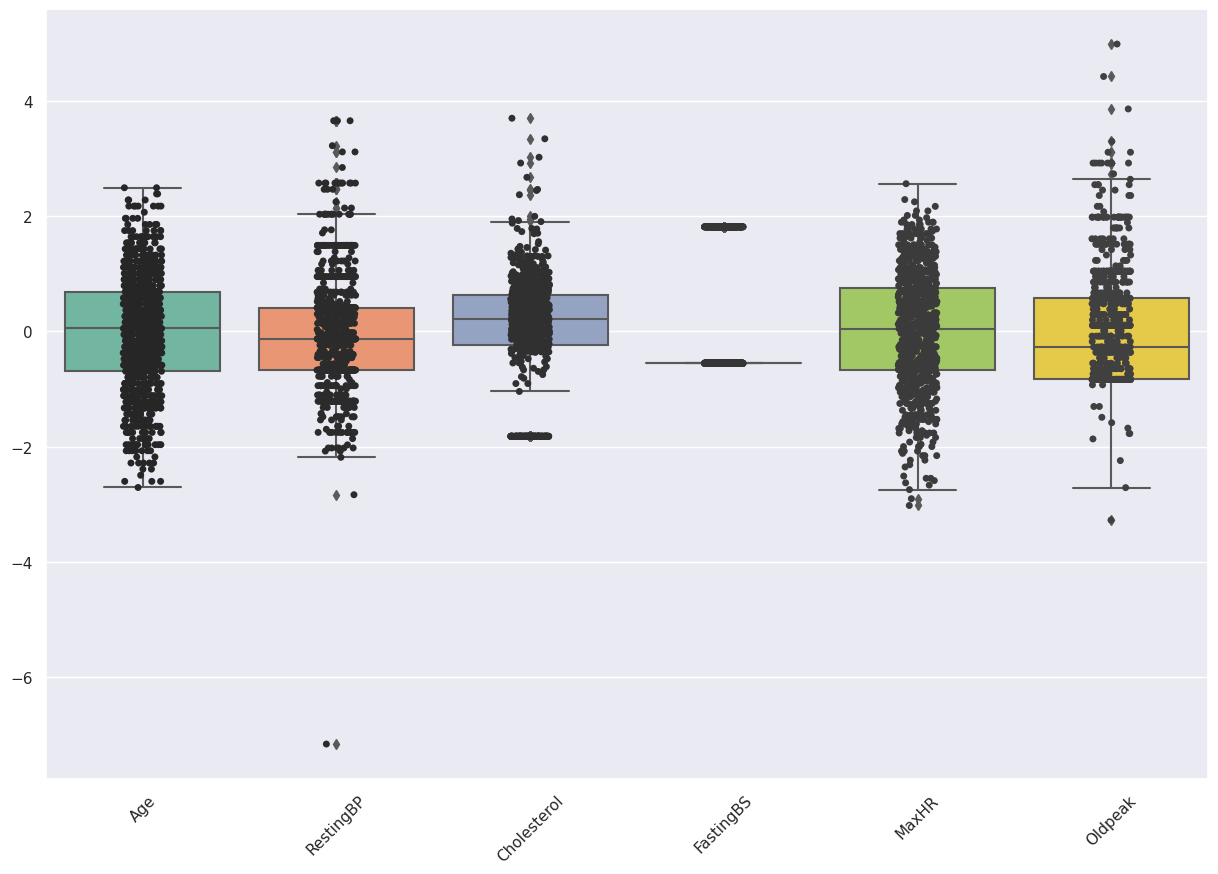

In [16]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

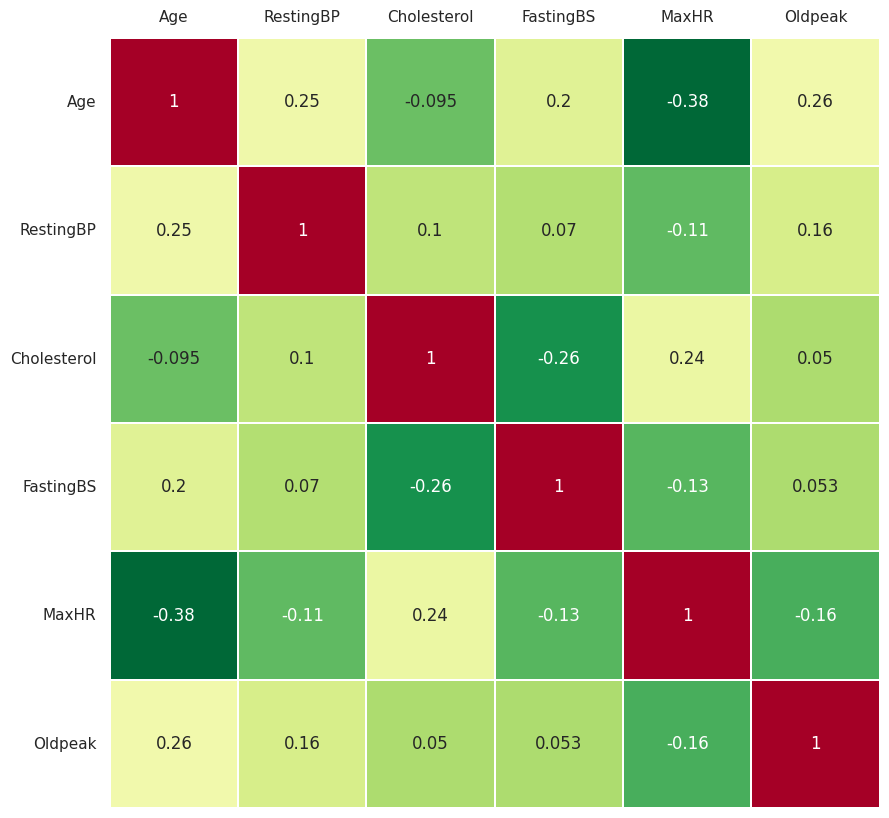

In [17]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, 'Z2')

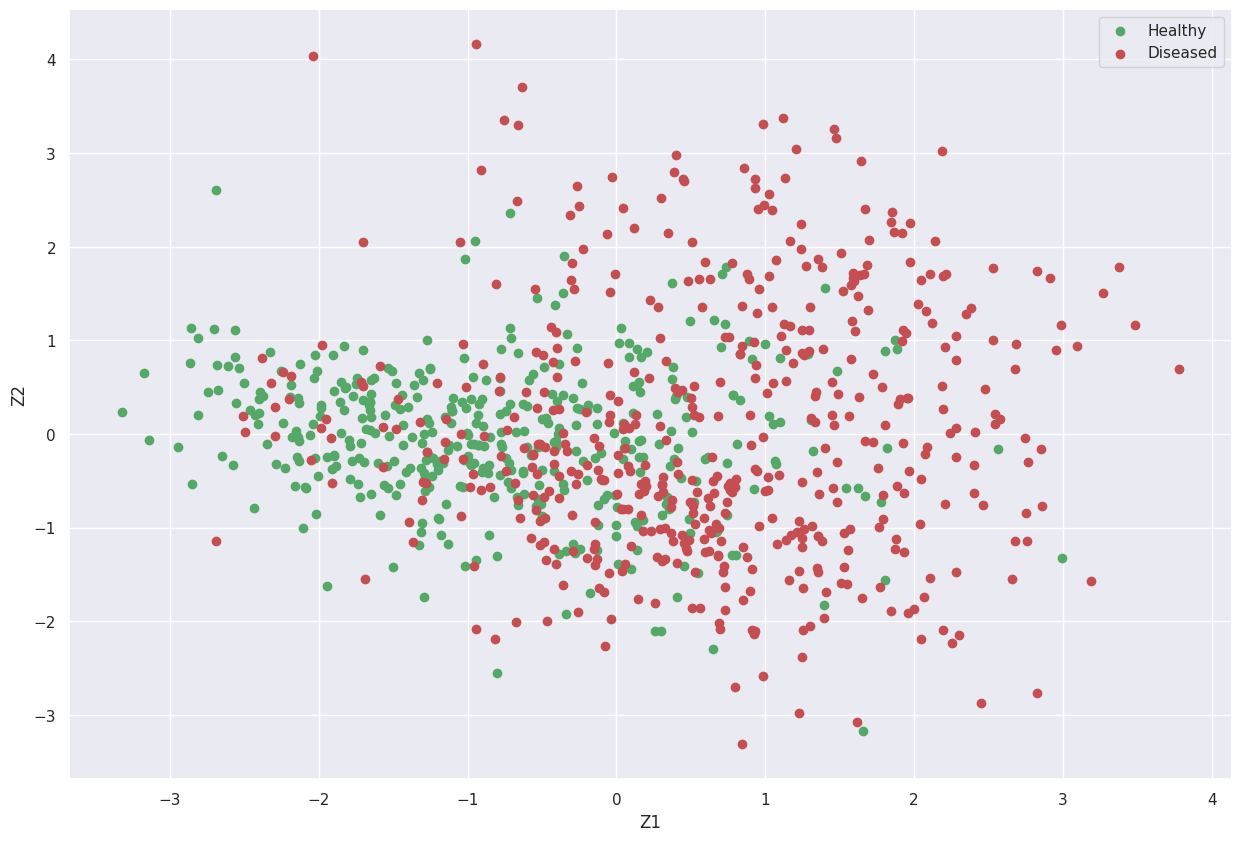

In [18]:
pca = PCA()
Z = pca.fit_transform(X)

# (DISEASED)->1,  (HEALTHY)->0

idx_healthy = np.where(y == 0)
idx_diseased = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_healthy,0], Z[idx_healthy,1], c='g', label='Healthy')
plt.scatter(Z[idx_diseased,0], Z[idx_diseased,1], c='r', label='Diseased')


plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')


array([[ 0.56568775, -0.14641307,  0.07815273, -0.13669721,  0.43882735,
        -0.66422674],
       [ 0.31484016, -0.47283838, -0.53054481, -0.41272429, -0.46692165,
         0.08639773],
       [-0.26677216, -0.6601164 , -0.08069691,  0.0191716 ,  0.6217504 ,
         0.31563563],
       [ 0.35465064,  0.38100662, -0.64659428,  0.36159816,  0.31999525,
         0.27896689],
       [-0.51126248, -0.1183642 , -0.47179671,  0.34740962, -0.10836342,
        -0.60792465],
       [ 0.35005609, -0.40007159,  0.25539393,  0.74776889, -0.2978281 ,
         0.06570776]])

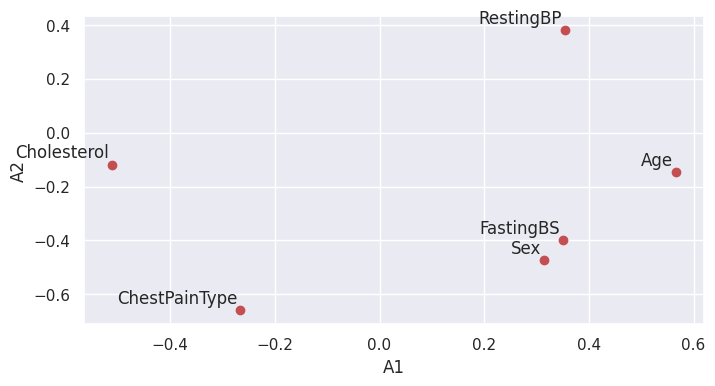

In [19]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


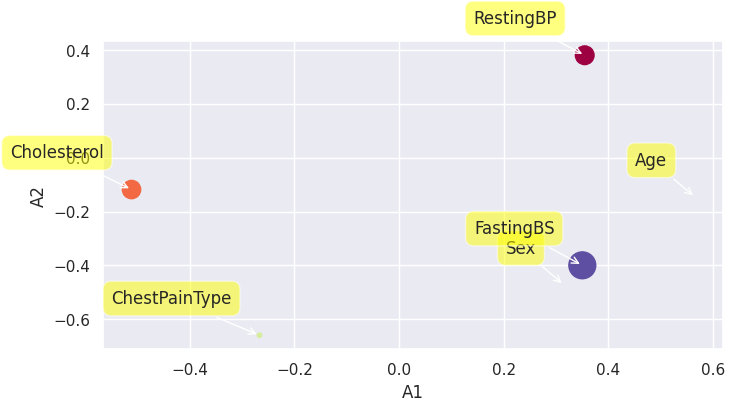

In [20]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

array([1.81798176, 1.27582732, 0.88533183, 0.81476283, 0.65826666,
       0.55437267])

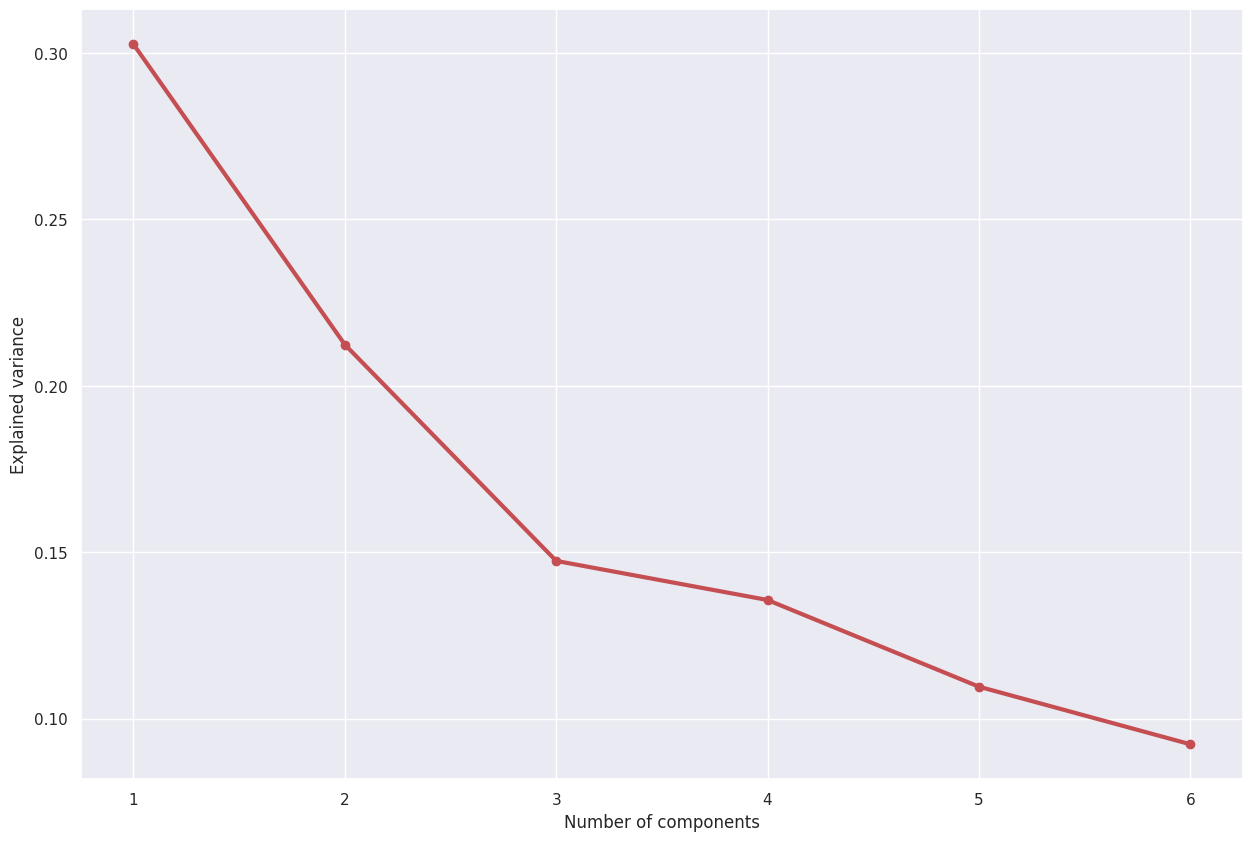

In [21]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

Text(0, 0.5, 'Cumulative explained variance')

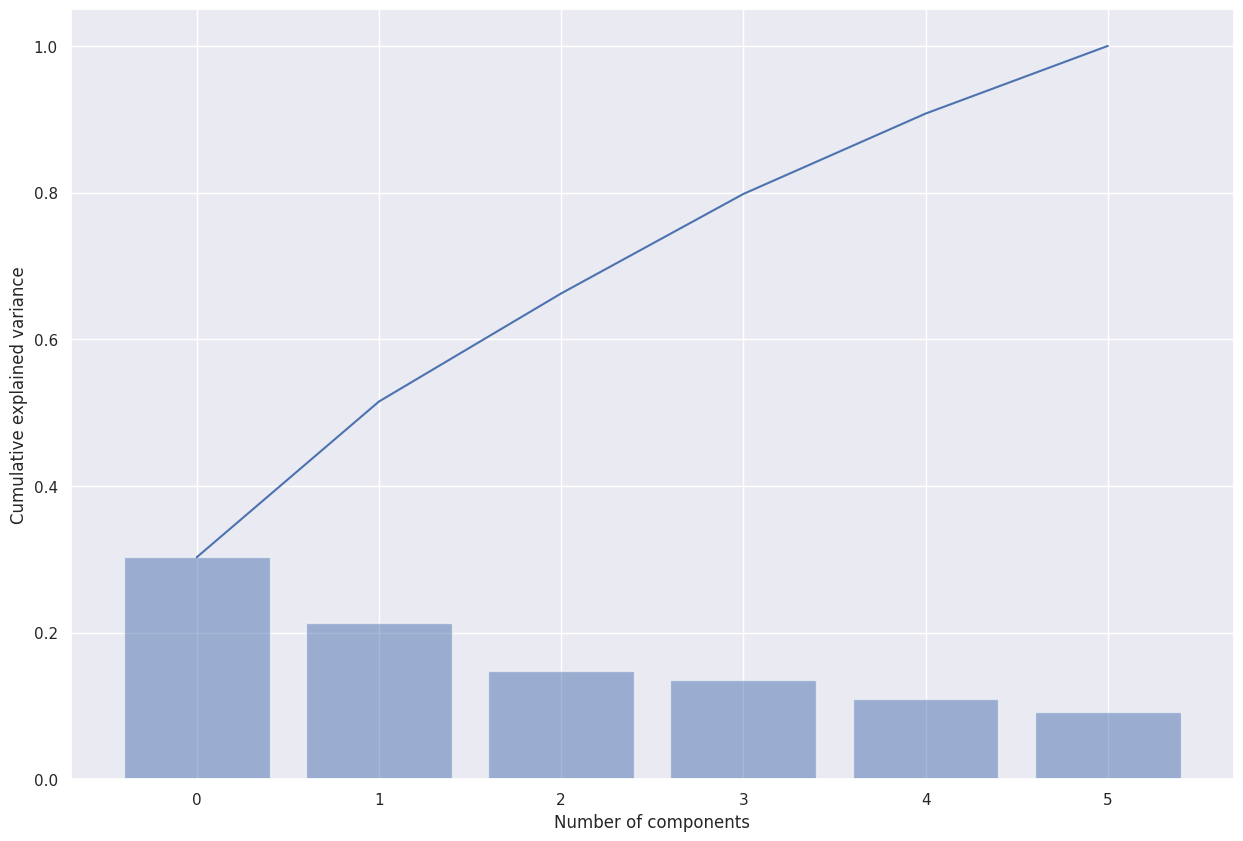

In [22]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([-5.69826840e-01, -8.63390083e-01,  1.12736412e-01, -4.55366335e-01,
       -2.42625785e-01, -3.35835868e-01, -6.86609917e-02,  6.07977013e-01,
       -3.95703721e-01,  8.90623593e-02,  3.42816181e-01, -4.03447042e-01,
        5.95599840e-01, -6.03961126e-01,  6.71719570e-01, -6.40204188e-01,
        8.17286036e-01,  4.58562421e-01,  2.32570928e-01, -9.33900363e-01,
        9.43772193e-01,  2.77359201e-01,  2.67818300e-01, -1.90502630e+00,
        2.90678253e-01,  2.02968949e-01, -1.03459216e+00,  3.62435126e-02,
       -9.53294797e-01,  3.78078400e-01, -2.08685887e+00,  4.43657333e-01,
       -5.29512431e-01, -1.78611471e-01, -1.66295464e-01,  2.28125259e-01,
       -3.27198877e-01,  5.56271335e-01,  1.50601951e+00, -7.55180863e-01,
       -4.91172504e-01, -2.27003912e-01, -5.78147295e-01, -5.65745324e-01,
        4.49565856e-01, -9.17906970e-01,  4.04951720e-01, -2.75044594e-01,
       -5.31283430e-01,  1.90542096e-01, -6.44848369e-01, -6.66725944e-02,
        8.78693253e-01,  

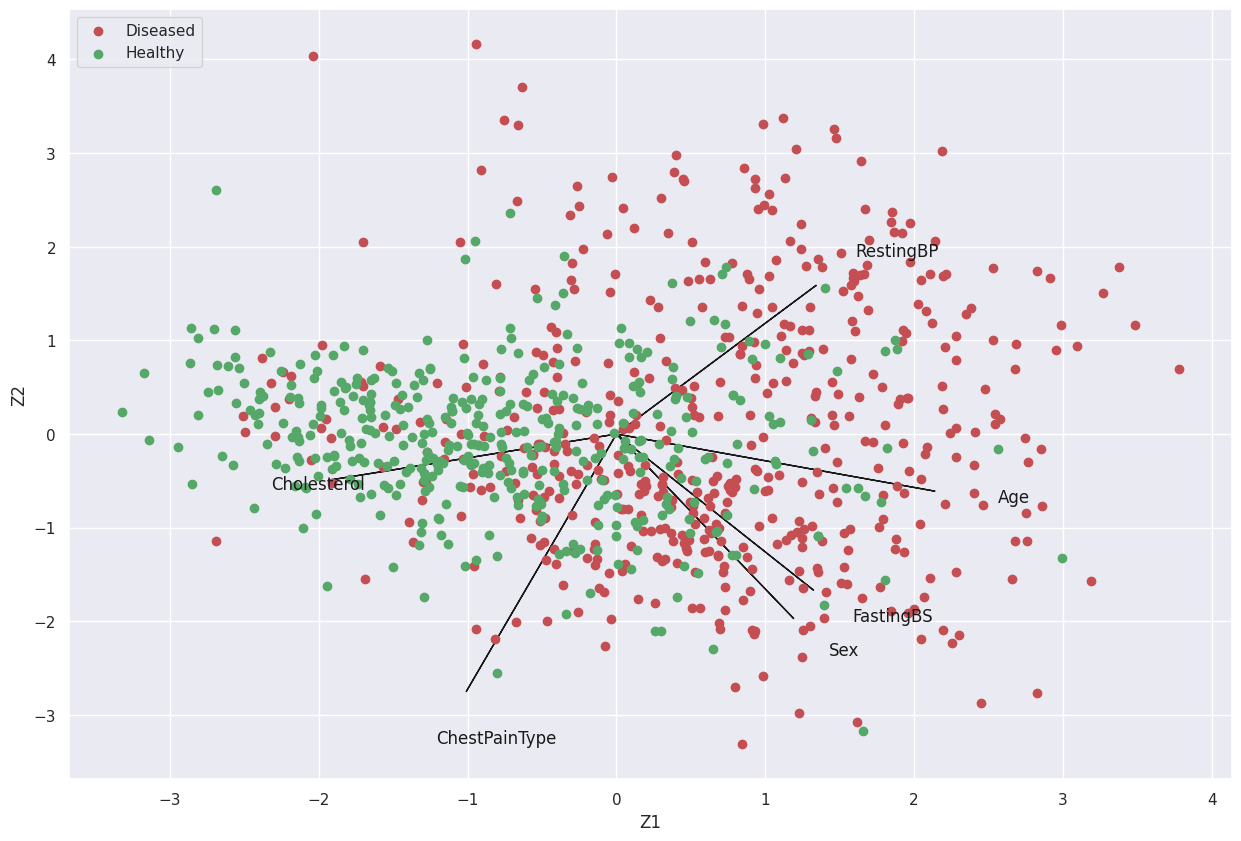

In [23]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_diseased,0], Z[idx_diseased,1], c='r', label='Diseased')
plt.scatter(Z[idx_healthy,0], Z[idx_healthy,1], c='g', label='Healthy')

plt.legend(loc='upper left')
Z1
Z2

In [24]:

!pip install pca

In [25]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)


[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [6] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[6]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [26]:

out['PC']

PC1       PC2       PC3       PC4       PC5       PC6
0   -2.095416 -0.569827 -0.905155 -0.299256 -0.386139  0.198634
1   -0.299252 -0.863390 -0.787288 -0.411923 -1.303039 -0.212905
2   -0.944148  0.112736  0.733138 -1.044054  0.007557  2.113874
3    0.312050 -0.455366  0.819853 -0.205345 -0.536374  1.030550
4    0.148751 -0.242626 -0.079391 -1.424413 -0.308478  0.182060
..        ...       ...       ...       ...       ...       ...
913 -1.047099  0.005764  1.044033  0.588668  0.296493  0.663681
914  2.465156 -0.757955 -0.856775  2.005709  0.209195 -0.422675
915  0.679347  0.190482  0.983441 -0.286838 -0.333607 -0.066269
916 -1.156345 -0.267594 -0.475469 -0.304698  0.347568 -1.246617
917 -1.991364  0.196036 -0.798784 -0.231987 -1.081367 -0.022816

[918 rows x 6 columns]

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (30.2% expl.var)', ylabel='PC2 (21.2% expl.var)'>)

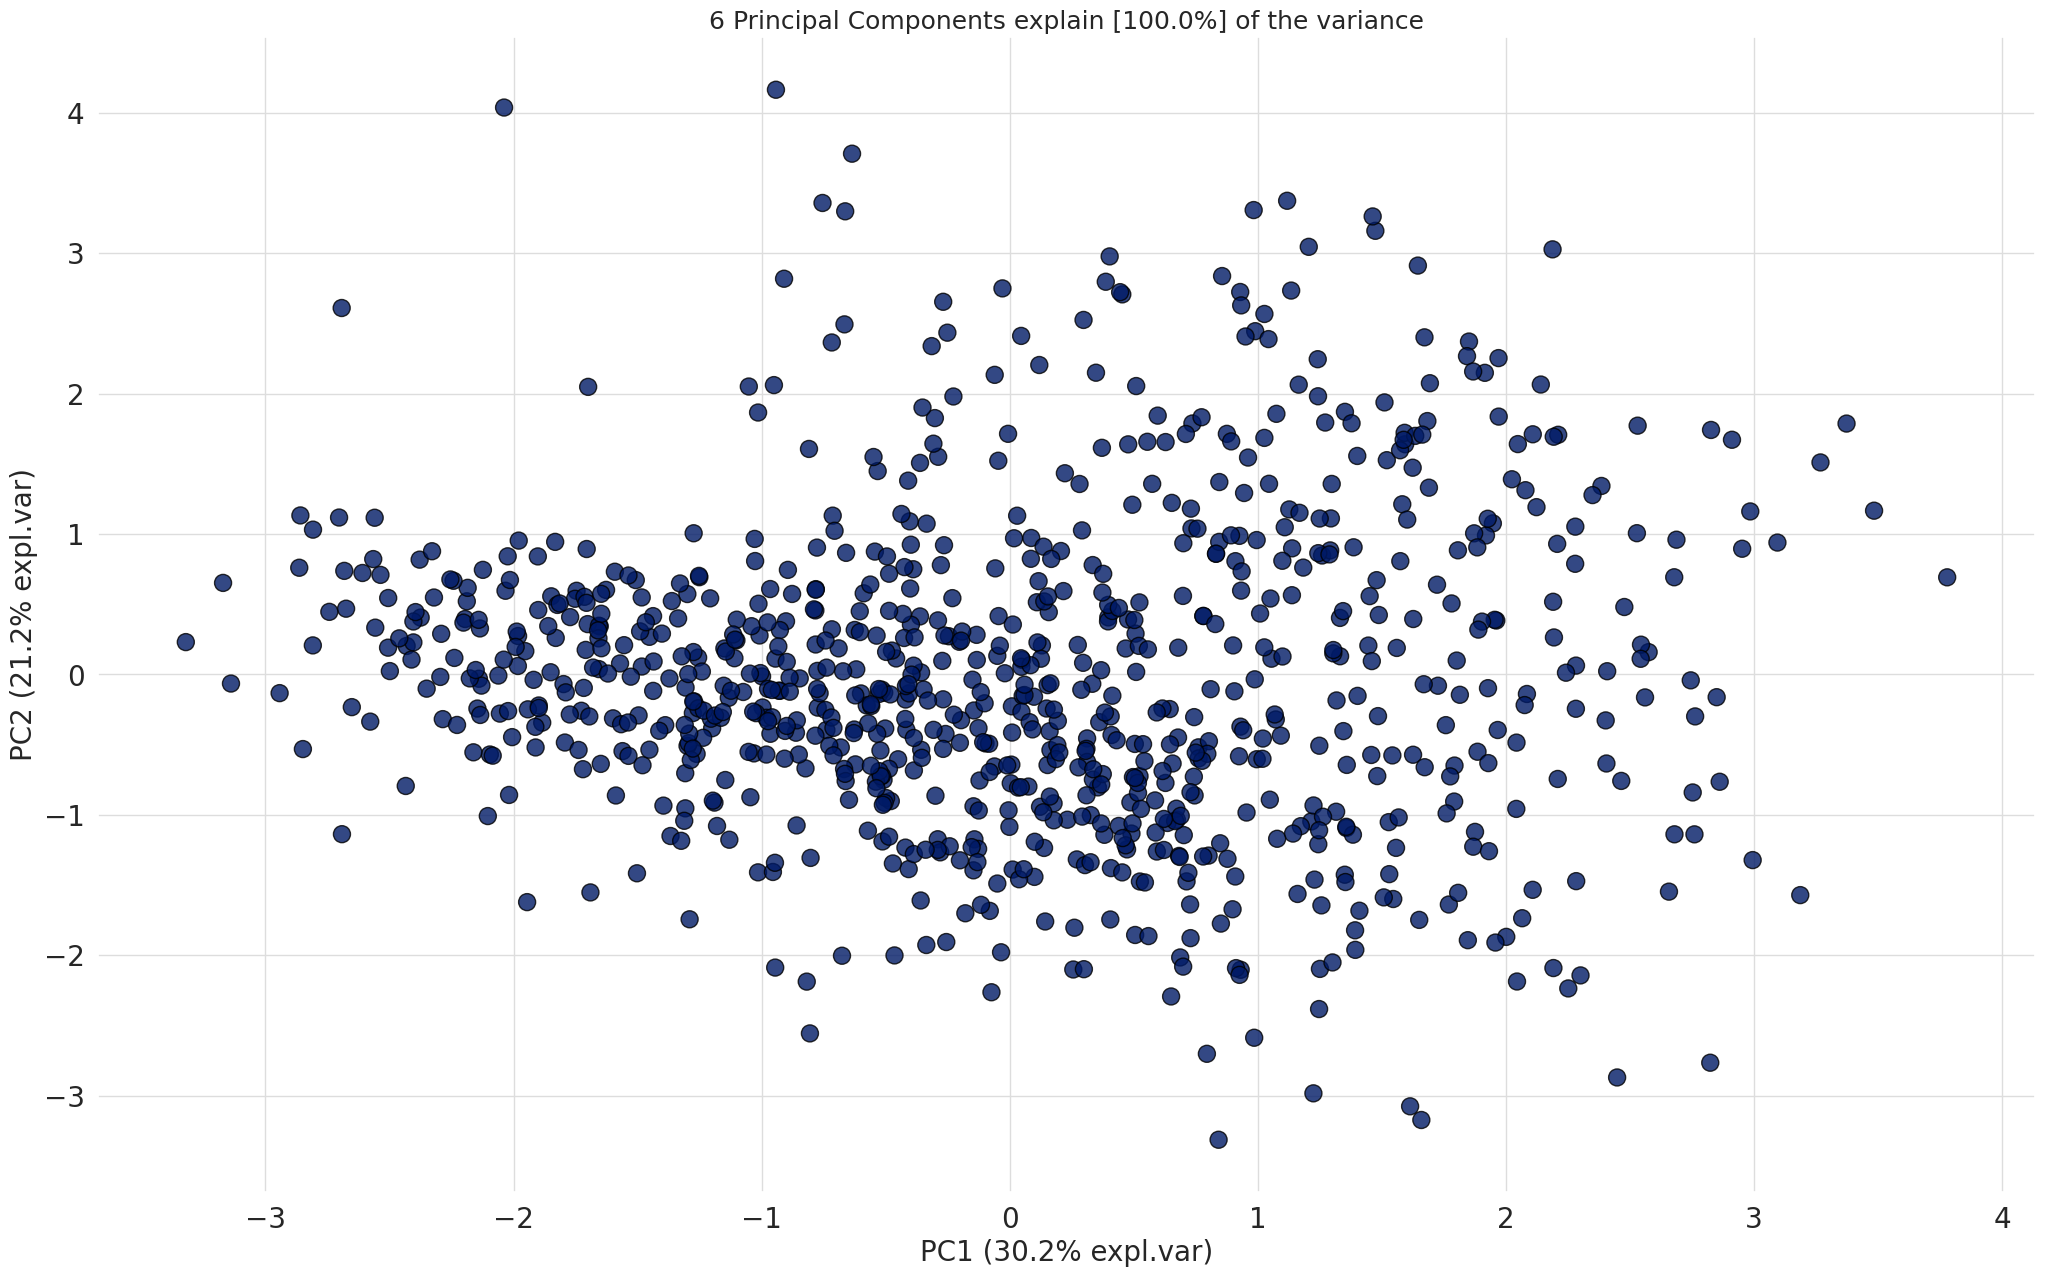

In [27]:
model.scatter(label=True, legend=False)

In [28]:

A = out['loadings'].T
A


PC1       PC2       PC3       PC4       PC5       PC6
Age          0.565688 -0.146413  0.078153 -0.136697  0.438827 -0.664227
RestingBP    0.314840 -0.472838 -0.530545 -0.412724 -0.466922  0.086398
Cholesterol -0.266772 -0.660116 -0.080697  0.019172  0.621750  0.315636
FastingBS    0.354651  0.381007 -0.646594  0.361598  0.319995  0.278967
MaxHR       -0.511262 -0.118364 -0.471797  0.347410 -0.108363 -0.607925
Oldpeak      0.350056 -0.400072  0.255394  0.747769 -0.297828  0.065708

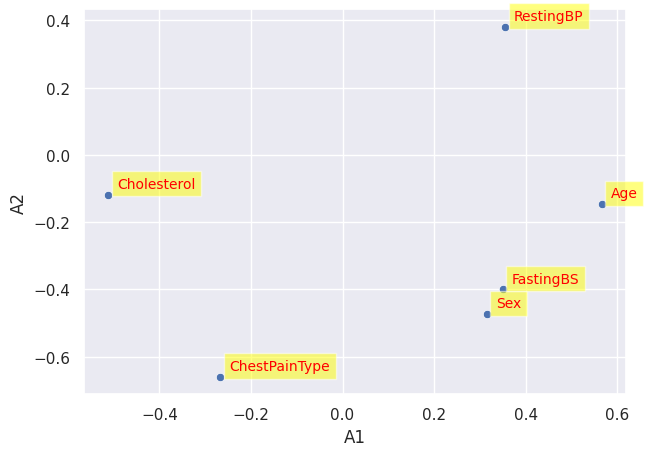

In [29]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

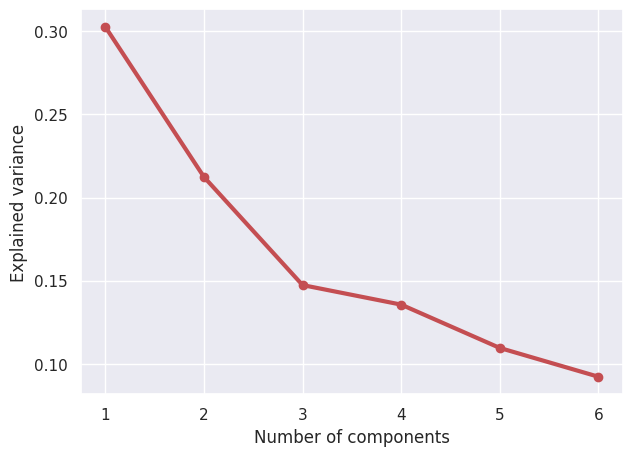

In [30]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

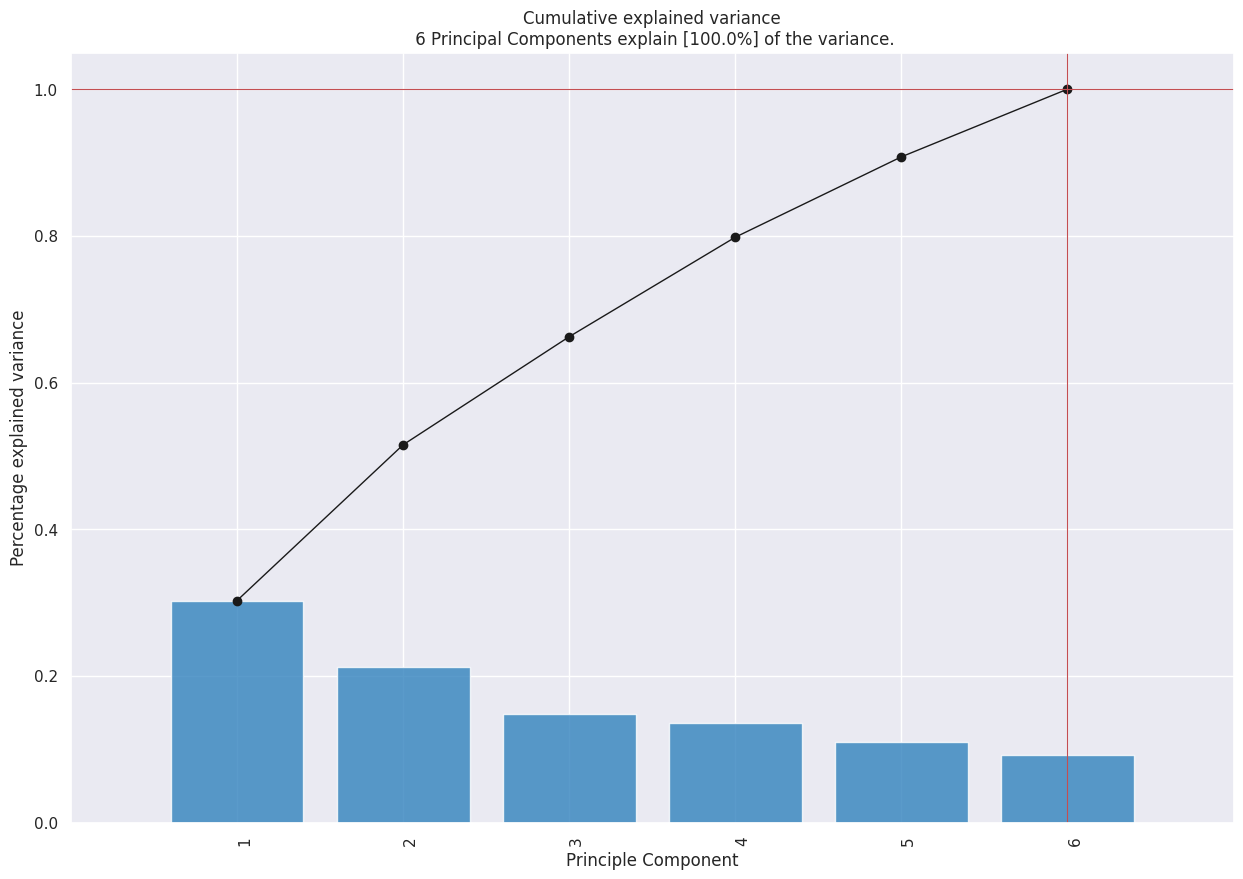

In [31]:

model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (30.2% expl.var)', ylabel='PC2 (21.2% expl.var)'>)

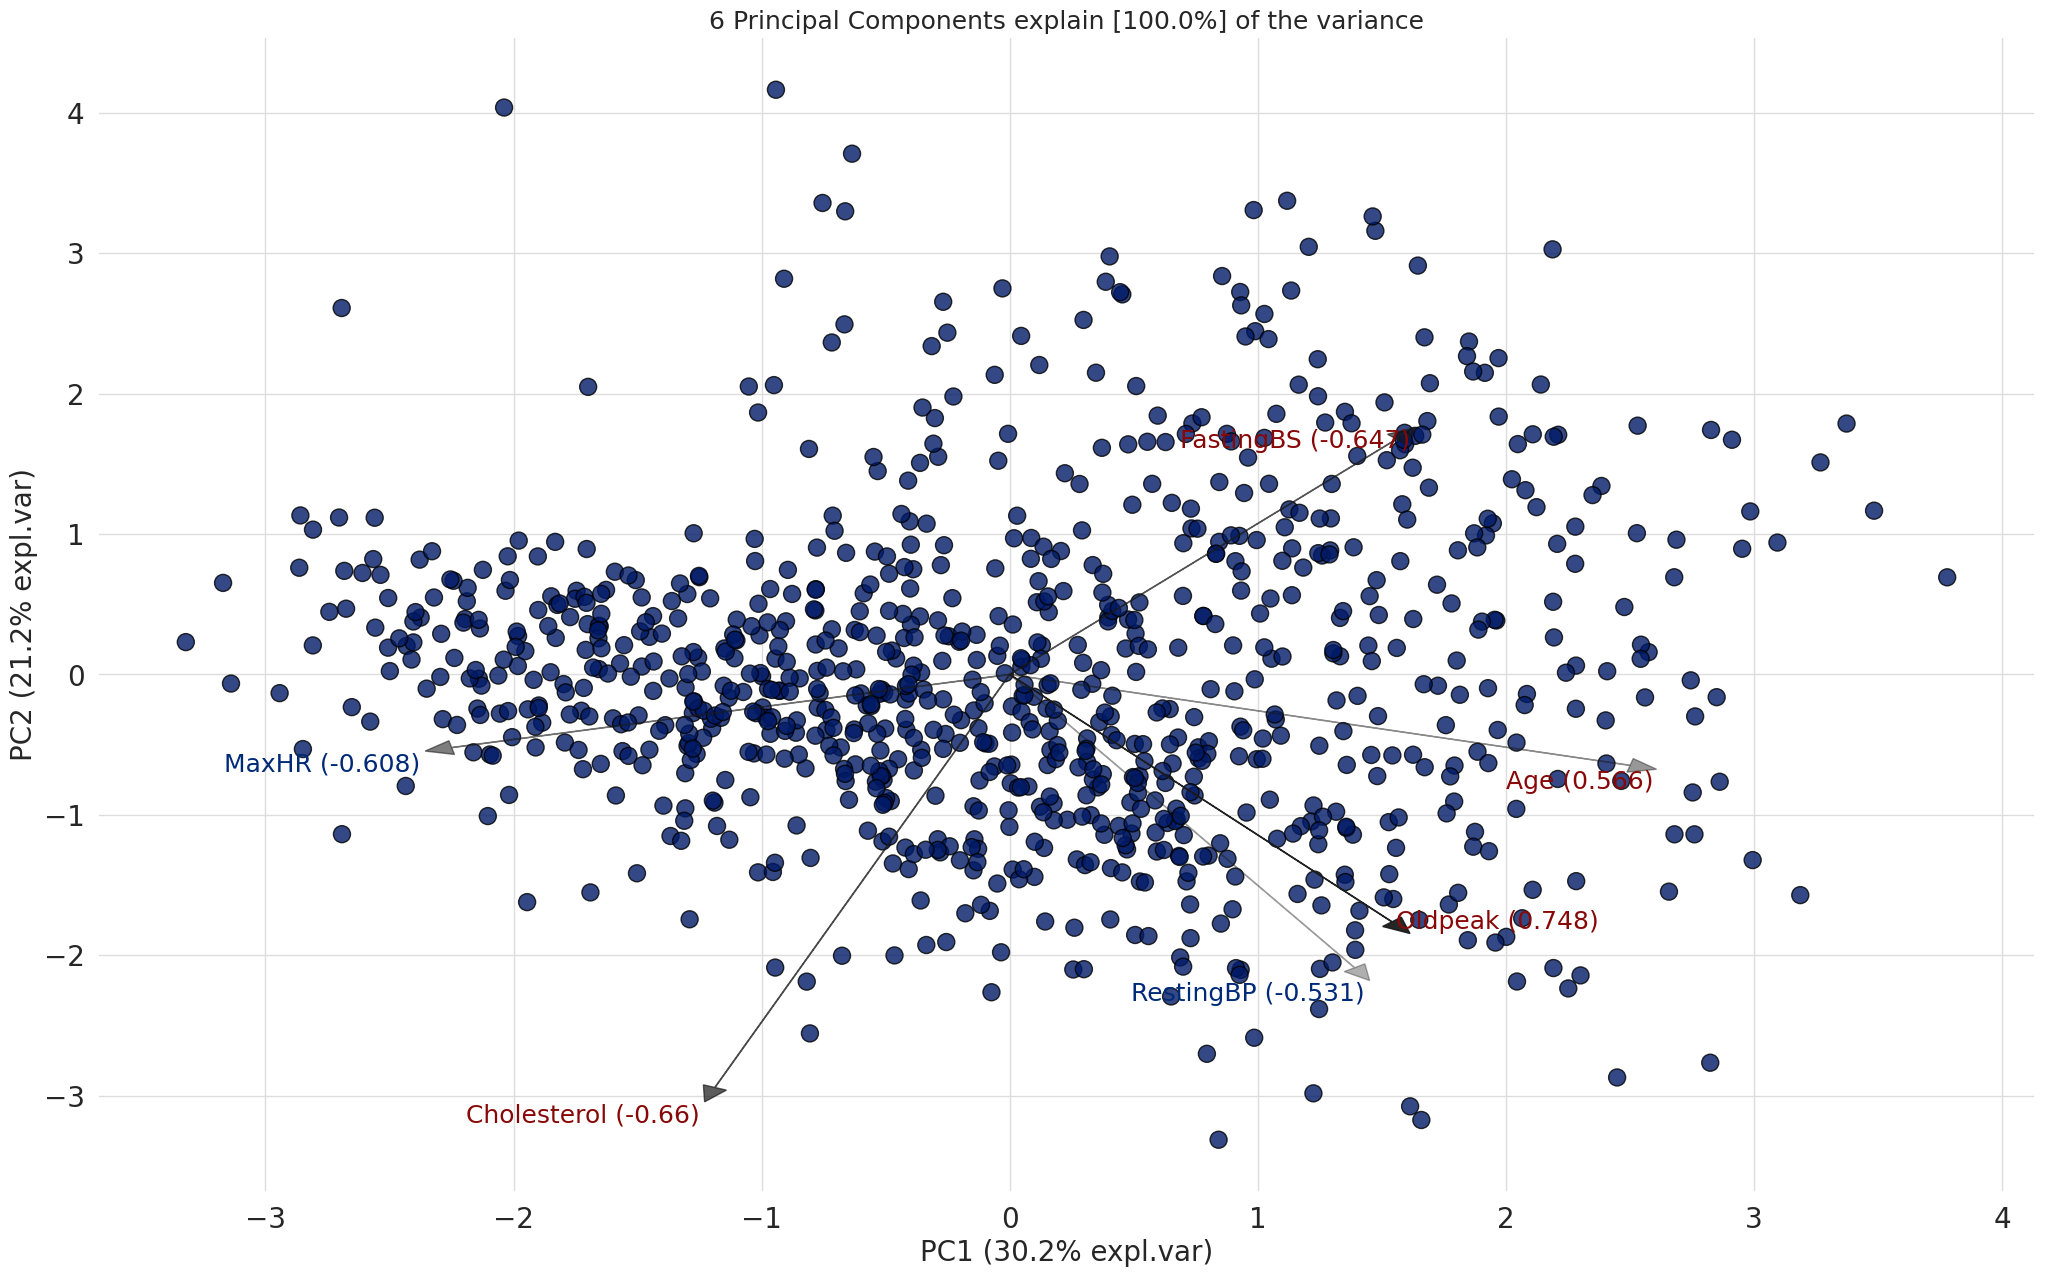

In [32]:

model.biplot(label=False, legend=False, color_arrow='k')

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '6 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (30.2% expl.var)', ylabel='PC2 (21.2% expl.var)', zlabel='PC3 (14.7% expl.var)'>)

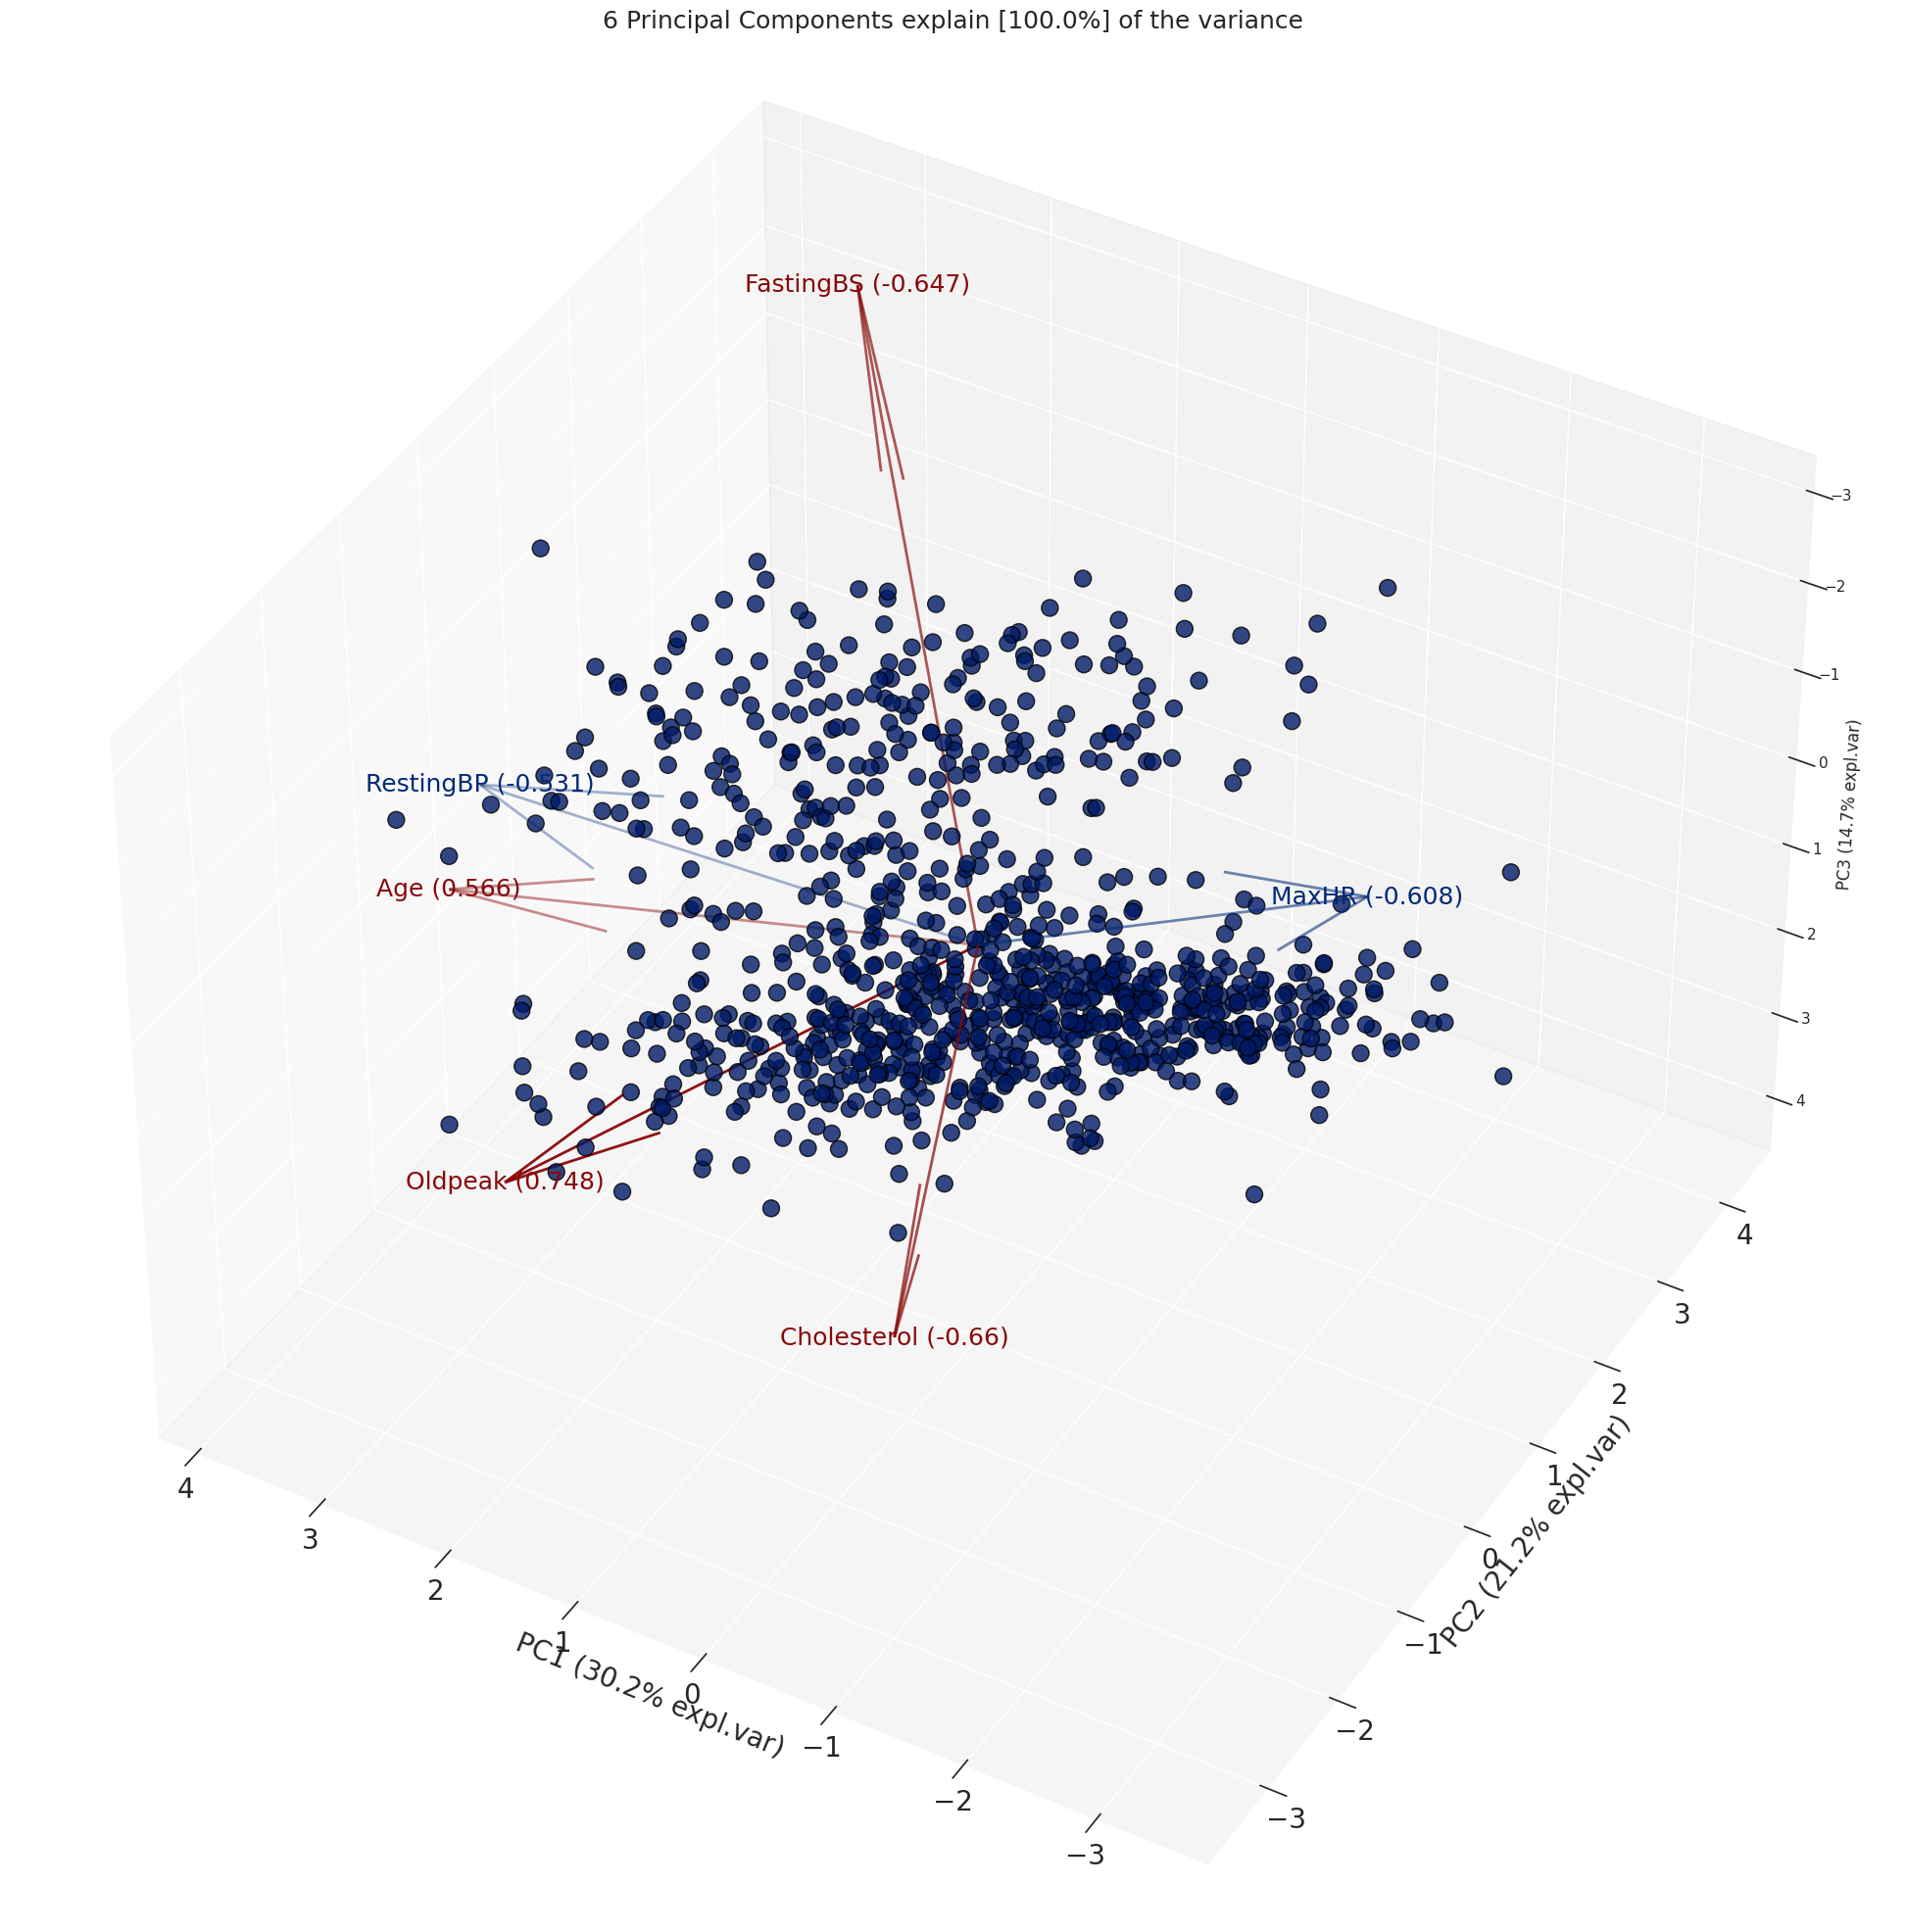

In [33]:

model.biplot3d(legend=False)

In [34]:

!pip install pycaret

In [35]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()


'3.2.0'

In [36]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (826, 12)
Unseen Data For Predictions: (92, 12)


In [37]:

from pycaret.classification import *
clf = setup(data=data, target='HeartDisease', train_size=0.7, session_id=123)

In [38]:
!pip install ipywidgets

import ipywidgets

In [39]:

#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [40]:

best_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=123)

In [41]:

lr = create_model('lr')


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:

tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [43]:

tuned_lr

LogisticRegression(C=0.472, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:

evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [45]:
ridge_pca = create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:

tuned_ridge_pca = tune_model(ridge_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [47]:
tuned_ridge_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [48]:
evaluate_model(tuned_ridge_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [49]:

lda_pca = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
tuned_lda_pca = tune_model(lda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [51]:

tuned_lda_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage='auto', solver='lsqr',
                           store_covariance=False, tol=0.0001)

In [52]:
evaluate_model(tuned_lda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [53]:

qda=create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
tuned_qda=tune_model(qda)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [55]:

tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [56]:

evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [57]:
pip install statsmodels --upgrade

In [58]:
clf_pca = setup(data=data, target='HeartDisease', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)


In [59]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [60]:

best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:

# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [62]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [63]:

lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [64]:

tuned_lr_pca = tune_model(lr_pca)


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [65]:
tuned_lr_pca

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [67]:
ridge_pca = create_model('ridge')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [68]:
tuned_ridge_pca = tune_model(ridge_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [69]:
tuned_ridge_pca

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

In [70]:
evaluate_model(tuned_ridge_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [71]:
lda_pca = create_model('lda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [72]:
tuned_lda_pca = tune_model(lda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [73]:
tuned_lda_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=0.9, solver='lsqr',
                           store_covariance=False, tol=0.0001)

In [74]:
evaluate_model(tuned_lda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [75]:
qda_pca = create_model('qda')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [76]:
tuned_qda_pca = tune_model(qda_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [77]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.83,
                              store_covariance=False, tol=0.0001)

In [78]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [79]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [80]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [81]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0005,
                     min_samples_leaf=3, min_samples_split=5,
                     min_weight_fraction_leaf=0.0, n_estimators=260, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [82]:
evaluate_model(tuned_et_pca)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [83]:
pip install pycaret[analysis]

  Using cached shap-0.44.1-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (535 kB)
  Attempting uninstall: shap
    Found existing installation: shap 0.23.0
    Uninstalling shap-0.23.0:
      Successfully uninstalled shap-0.23.0


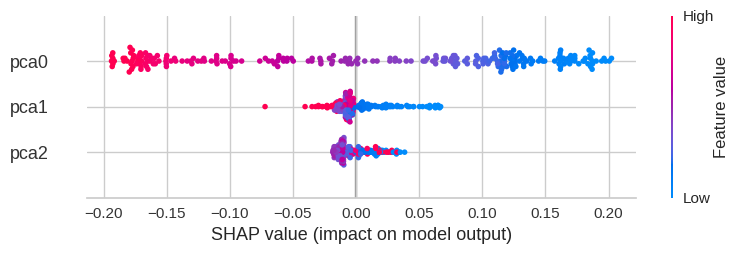

In [84]:
import shap
interpret_model(tuned_et_pca, plot='summary')

In [85]:
interpret_model(tuned_et_pca, plot='reason', observation=32)

In [86]:
interpret_model(tuned_et_pca, plot='reason')